<a href="https://colab.research.google.com/github/bmd94/Big-data-Project/blob/main/Big%20data%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run below commands in google colab
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark3.0.0
!wget -q http://apache.osuosl.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz 
# unzip it
!tar xf spark-3.0.2-bin-hadoop3.2.tgz 
# install findspark 
!pip install -q findspark

In [ ]:
# 2. Setup Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark
#df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
#df.show(3, False)

In [ ]:
# Check the pyspark version
import pyspark
print(pyspark.__version__)

3.0.2


In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *     # for all types of data
import pyspark.sql.functions as F   # import all functions
from pyspark.sql.functions import udf, col      # Creates a user defined function (UDF),Returns a Column based on the given column name.
 
sc = SparkContext.getOrCreate()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
.builder\
.appName("Python Spark create U1-U2 edges") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()

In [ ]:
tr = sc.textFile("/content/drive/MyDrive/Kaggle/fadi/T_R")
tm = sc.textFile("/content/drive/MyDrive/Kaggle/fadi/T_M")

In [ ]:
tr.first()

'cervical-cancer-prevention-week-2018,doncaster_uk,rdash_nhs'

In [ ]:
tr.take(5)

['cervical-cancer-prevention-week-2018,doncaster_uk,rdash_nhs',
 'cervical-cancer-prevention-week-2018,bengnonny,dokilink',
 'cervical-cancer-prevention-week-2018,",samyarwood89',
 'cervical-cancer-prevention-week-2018,dawnthomas2311,RCObsGyn',
 'cervical-cancer-prevention-week-2018,hannah_travis1,grace_women']

In [ ]:
tm.first()

'cervical-cancer-prevention-week-2018,rdash_nhs,JoTrust'

In [ ]:
tm.take(5)

['cervical-cancer-prevention-week-2018,rdash_nhs,JoTrust',
 'cervical-cancer-prevention-week-2018,rdash_nhs,JoTrust',
 'cervical-cancer-prevention-week-2018,doncaster_uk,JoTrust',
 'cervical-cancer-prevention-week-2018,doncaster_uk,rdash_nhs',
 'cervical-cancer-prevention-week-2018,doncaster_uk,JoTrust']

In [ ]:
tr.count(), tm.count()

(4008, 12364)

In [ ]:
tr_c = tr.filter(lambda row: '"' not in row).filter(lambda row: ' ' not in row).filter(lambda row: "'" not in row)
tr_c.take(5)

['cervical-cancer-prevention-week-2018,doncaster_uk,rdash_nhs',
 'cervical-cancer-prevention-week-2018,bengnonny,dokilink',
 'cervical-cancer-prevention-week-2018,dawnthomas2311,RCObsGyn',
 'cervical-cancer-prevention-week-2018,hannah_travis1,grace_women',
 'cervical-cancer-prevention-week-2018,izzykacz,Roche']

In [ ]:
tm_c = tm.filter(lambda row: '"' not in row).filter(lambda row: ' ' not in row).filter(lambda row: "'" not in row)
tm_c.take(5)

['cervical-cancer-prevention-week-2018,rdash_nhs,JoTrust',
 'cervical-cancer-prevention-week-2018,rdash_nhs,JoTrust',
 'cervical-cancer-prevention-week-2018,doncaster_uk,JoTrust',
 'cervical-cancer-prevention-week-2018,doncaster_uk,rdash_nhs',
 'cervical-cancer-prevention-week-2018,doncaster_uk,JoTrust']

In [ ]:
print('The old size of tr ',tr.count(),' and old size of tm ',tm.count())
print('The new size of tr ',tr_c.count(),' and new size of tm ',tm_c.count())

The old size of tr  4008  and old size of tm  12364
The new size of tr  2793  and new size of tm  9006


In [ ]:
union = tr_c.union(tm_c)
union.take(5)

['cervical-cancer-prevention-week-2018,doncaster_uk,rdash_nhs',
 'cervical-cancer-prevention-week-2018,bengnonny,dokilink',
 'cervical-cancer-prevention-week-2018,dawnthomas2311,RCObsGyn',
 'cervical-cancer-prevention-week-2018,hannah_travis1,grace_women',
 'cervical-cancer-prevention-week-2018,izzykacz,Roche']

In [ ]:
print('The size of union of tm and tr is ',union.count())

The size of union of tm and tr is  11799


In [ ]:
#   Map
map = union.map(lambda x: (x,1))
map.take(5)

[('cervical-cancer-prevention-week-2018,doncaster_uk,rdash_nhs', 1),
 ('cervical-cancer-prevention-week-2018,bengnonny,dokilink', 1),
 ('cervical-cancer-prevention-week-2018,dawnthomas2311,RCObsGyn', 1),
 ('cervical-cancer-prevention-week-2018,hannah_travis1,grace_women', 1),
 ('cervical-cancer-prevention-week-2018,izzykacz,Roche', 1)]

In [ ]:
#   Reduce
u_u = map.reduceByKey(lambda x,y:(x+y))

In [ ]:
u_u.take(10)

[('cervical-cancer-prevention-week-2018,hannah_travis1,grace_women', 3),
 ('cervical-cancer-prevention-week-2018,wustlphs,SitemanCenter', 3),
 ('cervical-cancer-prevention-week-2018,drcarolineg,GP_Update', 3),
 ('cervical-cancer-prevention-week-2018,alisonparker01,rdash_nhs', 3),
 ('cervical-cancer-prevention-week-2018,britnancy,Roche', 3),
 ('cervical-cancer-prevention-week-2018,cozbarrier,sloan_kettering', 3),
 ('cervical-cancer-prevention-week-2018,chris_g_smith1,sloan_kettering', 3),
 ('cervical-cancer-prevention-week-2018,sekretapproved,RyR_Empire', 3),
 ('cervical-cancer-prevention-week-2018,lindahalsey2,Advaxis', 3),
 ('cervical-cancer-prevention-week-2018,canisgallicus,dublinwellwoman', 3)]

In [ ]:
u_u.count()

4279

# SAVE FILE AS CSV

In [ ]:
# path '\user\output\uu'
# 1
u_u.saveAsTextFile('uu')

In [ ]:
from fileinput import input 
# to get the file as input and to can be used to update and append the data in the file
from glob import glob
# finds all the pathnames matching a specified pattern
# path '\user\output\uu'
u=''.join(sorted(input(glob('/content/uu' + "/part-0000*"))))
# we will create a file with name U_U.csv
with open('U_U.csv','w',encoding='utf-8') as file:
    file.write('context,from,to,weight\n')
    file.write(str(u).replace('(','').replace(')','').replace("'",'').replace(' ',''))

In [ ]:
# 2
#####################################################
#################### PATH ###########################
tweet.toPandas().to_csv('uu.csv')

NameError: ignored

In [ ]:
u_u.first()[0].split(',')[0]

'cervical-cancer-prevention-week-2018'

In [ ]:
m = u_u.map(lambda x: ((x[0].split(',')[0],x[0].split(',')[2]),x[1]))

In [ ]:
m.first()

(('cervical-cancer-prevention-week-2018', 'grace_women'), 3)

In [ ]:
r = m.reduceByKey(lambda x,y: x+y)

In [ ]:
r.take(10)

[(('cervical-cancer-prevention-week-2018', 'GP_Update'), 3),
 (('cervical-cancer-prevention-week-2018', 'med_indonews'), 3),
 (('cervical-cancer-prevention-week-2018', 'Scouse_ma'), 9),
 (('dry-january-2018', 'ReadingFairyBex'), 3),
 (('dry-january-2018', 'kelleybra'), 3),
 (('time-to-talk-day-2018', 'bsgltd'), 3),
 (('time-to-talk-day-2018', 'FreshPlusGroup'), 12),
 (('rare-disease-day-2018', 'mandymcknight'), 3),
 (('rare-disease-day-2018', 'SWAN_UK'), 5),
 (('rare-disease-day-2018', 'the2weekwait'), 3)]

In [ ]:
r.takeOrdered(10, key = lambda x: -x[1])

[(('ocd-awareness-week-2018', 'lwbean'), 428),
 (('jeans-for-genes-day', 'MrsAnneTwist'), 328),
 (('mental-health-awareness-week-2018', 'JamesMelville'), 285),
 (('jeans-for-genes-day', 'JeansforGenes'), 254),
 (('wear-purple-for-jia-2018', 'Ed_Miliband'), 178),
 (('elf-day', 'alzheimerssoc'), 136),
 (('national-dementia-carers-2018', 'CareQualityComm'), 108),
 (('wear-purple-for-jia-2018', 'JIA_NRAS'), 82),
 (('time-to-talk-day-2018', 'The_UnSilent_'), 75),
 (('elf-day', 'thesovrangroup'), 75)]

In [ ]:
outSort[-1]

NameError: ignored

## Top 10 (IC U) incoming users per context 

In [ ]:
r.filter(lambda x: x[0][0]=='16-days-of-action-2018').takeOrdered(10, key = lambda x: -x[1])

In [ ]:
r.filter(lambda x: x[0][0]=='brain-awareness-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('brain-awareness-week-2018', 'neuroscience'), 24),
 (('brain-awareness-week-2018', 'HydroAssoc'), 18),
 (('brain-awareness-week-2018', 'brianmaycom'), 15),
 (('brain-awareness-week-2018', 'UoR_LifeScience'), 15),
 (('brain-awareness-week-2018', 'jopackaj'), 14),
 (('brain-awareness-week-2018', 'LundbeckUS'), 12),
 (('brain-awareness-week-2018', 'ARUKnews'), 12),
 (('brain-awareness-week-2018', 'brainfilmfest'), 12),
 (('brain-awareness-week-2018', 'MercuryMOTG'), 10),
 (('brain-awareness-week-2018', 'CAUK1'), 10)]

In [ ]:
r.filter(lambda x: x[0][0]=='brain-injury-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('brain-injury-week-2018', 'HeadwayUK'), 65),
 (('brain-injury-week-2018', 'UKABIF'), 24),
 (('brain-injury-week-2018', 'RhonddaBryant'), 20),
 (('brain-injury-week-2018', 'cbituk'), 20),
 (('brain-injury-week-2018', 'NeuroConvention'), 19),
 (('brain-injury-week-2018', 'NovumLaw'), 16),
 (('brain-injury-week-2018', 'Headway_Roth'), 13),
 (('brain-injury-week-2018', 'Headwayshrop'), 12),
 (('brain-injury-week-2018', 'HeadwayESussex'), 12),
 (('brain-injury-week-2018', 'TrulyRoo'), 12)]

In [ ]:
r.filter(lambda x: x[0][0]=='carers-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('carers-week-2018', 'HappyLittleHugh'), 36),
 (('carers-week-2018', 'carersweek'), 26),
 (('carers-week-2018', 'Familywork123'), 21),
 (('carers-week-2018', 'InvolveT1'), 16),
 (('carers-week-2018', 'CarersUK'), 16),
 (('carers-week-2018', 'NottsHealthcare'), 16),
 (('carers-week-2018', 'mndassoc'), 12),
 (('carers-week-2018', 'CarersLeeds'), 10),
 (('carers-week-2018', 'Joanna_Rapson'), 9),
 (('carers-week-2018', 'c_oreilly'), 9)]

In [ ]:
r.filter(lambda x: x[0][0]=='cervical-cancer-prevention-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('cervical-cancer-prevention-week-2018', 'JoTrust'), 16),
 (('cervical-cancer-prevention-week-2018', 'RCObsGyn'), 12),
 (('cervical-cancer-prevention-week-2018', 'AmericanCancer'), 12),
 (('cervical-cancer-prevention-week-2018', 'Scouse_ma'), 9),
 (('cervical-cancer-prevention-week-2018', 'Advaxis'), 9),
 (('cervical-cancer-prevention-week-2018', 'sloan_kettering'), 9),
 (('cervical-cancer-prevention-week-2018', 'rdash_nhs'), 9),
 (('cervical-cancer-prevention-week-2018', 'zopitaux'), 9),
 (('cervical-cancer-prevention-week-2018', 'CDC_Cancer'), 9),
 (('cervical-cancer-prevention-week-2018', 'StopHPVCancer'), 8)]

In [ ]:
r.filter(lambda x: x[0][0]=='dementia-action-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('dementia-action-week-2018', 'EustacedeSousa'), 15),
 (('dementia-action-week-2018', 'AvrilChaffeyPR'), 12),
 (('dementia-action-week-2018', 'CastleMall'), 10),
 (('dementia-action-week-2018', 'CornExchange'), 10),
 (('dementia-action-week-2018', 'SouthendRPiJams'), 6),
 (('dementia-action-week-2018', 'DesignRealityUK'), 6),
 (('dementia-action-week-2018', 'WhoseShoes'), 6),
 (('dementia-action-week-2018', 'DiverseAlz'), 6),
 (('dementia-action-week-2018', 'grahamemorris'), 6),
 (('dementia-action-week-2018', 'knowsleyhousing'), 6)]

In [ ]:
r.filter(lambda x: x[0][0]=='dry-january-2018').takeOrdered(10, key = lambda x: -x[1])

[(('dry-january-2018', '31DOVER'), 21),
 (('dry-january-2018', 'kategarraway'), 18),
 (('dry-january-2018', 'chesterdotcom'), 18),
 (('dry-january-2018', 'SeedlipDrinks'), 14),
 (('dry-january-2018', 'urbano32chester'), 12),
 (('dry-january-2018', 'luscombedrinks'), 6),
 (('dry-january-2018', 'anne_conolly'), 6),
 (('dry-january-2018', 'PunchlineGlos'), 6),
 (('dry-january-2018', 'dryjanuary'), 5),
 (('dry-january-2018', 'dianehenderiks'), 4)]

In [ ]:
r.filter(lambda x: x[0][0]=='eating-disorder-awareness-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('eating-disorder-awareness-week-2018', 'beatED'), 30),
 (('eating-disorder-awareness-week-2018', 'PennyRed'), 27),
 (('eating-disorder-awareness-week-2018', 'normanlamb'), 24),
 (('eating-disorder-awareness-week-2018', 'jamesldowns'), 18),
 (('eating-disorder-awareness-week-2018', 'BeatEDSupport'), 16),
 (('eating-disorder-awareness-week-2018', 'StopBullyingGov'), 15),
 (('eating-disorder-awareness-week-2018', 'allontheboard'), 12),
 (('eating-disorder-awareness-week-2018', 'DrEMcNaught'), 12),
 (('eating-disorder-awareness-week-2018', 'HopeVirgo'), 11),
 (('eating-disorder-awareness-week-2018', 'EmiForLove'), 11)]

In [ ]:
r.filter(lambda x: x[0][0]=='elf-day').takeOrdered(10, key = lambda x: -x[1])

[(('elf-day', 'alzheimerssoc'), 136),
 (('elf-day', 'thesovrangroup'), 75),
 (('elf-day', 'rdash_nhs'), 21),
 (('elf-day', 'Flaketweet'), 15),
 (('elf-day', 'RinginglowArrow'), 15),
 (('elf-day', 'NisaRetail'), 14),
 (('elf-day', 'heartofacutemed'), 12),
 (('elf-day', 'Hill_Care_'), 12),
 (('elf-day', 'jacksju1'), 10),
 (('elf-day', 'barryoor'), 10)]

In [ ]:
r.filter(lambda x: x[0][0]=='elf-day').takeOrdered(10, key = lambda x: -x[1])

[(('elf-day', 'alzheimerssoc'), 136),
 (('elf-day', 'thesovrangroup'), 75),
 (('elf-day', 'rdash_nhs'), 21),
 (('elf-day', 'Flaketweet'), 15),
 (('elf-day', 'RinginglowArrow'), 15),
 (('elf-day', 'NisaRetail'), 14),
 (('elf-day', 'heartofacutemed'), 12),
 (('elf-day', 'Hill_Care_'), 12),
 (('elf-day', 'jacksju1'), 10),
 (('elf-day', 'barryoor'), 10)]

In [ ]:
r.filter(lambda x: x[0][0]=='epilepsy-awareness-purple-day-2018').takeOrdered(10, key = lambda x: -x[1])

[(('epilepsy-awareness-purple-day-2018', 'gblagden'), 40),
 (('epilepsy-awareness-purple-day-2018', 'JennieJacques1'), 35),
 (('epilepsy-awareness-purple-day-2018', 'OntarioNDP'), 15),
 (('epilepsy-awareness-purple-day-2018', 'MissJainaSolo'), 13),
 (('epilepsy-awareness-purple-day-2018', 'cavs'), 9),
 (('epilepsy-awareness-purple-day-2018', 'MentorSkywalker'), 7),
 (('epilepsy-awareness-purple-day-2018', 'bsyngap'), 6),
 (('epilepsy-awareness-purple-day-2018', 'EpilepsyCO'), 6),
 (('epilepsy-awareness-purple-day-2018', 'epilepsyaction'), 6),
 (('epilepsy-awareness-purple-day-2018', 'minsaude'), 6)]

In [ ]:
r.filter(lambda x: x[0][0]=='experience-of-care-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('experience-of-care-week-2018', 'TerriSonger'), 24),
 (('experience-of-care-week-2018', 'uicfmr'), 18),
 (('experience-of-care-week-2018', 'UIHealth'), 14),
 (('experience-of-care-week-2018', 'BerylInstitute'), 14),
 (('experience-of-care-week-2018', 'VCHResearch'), 12),
 (('experience-of-care-week-2018', 'EvelynFigs'), 12),
 (('experience-of-care-week-2018', 'winslow_mark'), 12),
 (('experience-of-care-week-2018', 'Herrings18'), 12),
 (('experience-of-care-week-2018', 'MtSinaiQueens'), 10),
 (('experience-of-care-week-2018', 'HelenKaragio'), 9)]

In [ ]:
r.filter(lambda x: x[0][0]=='jeans-for-genes-day').takeOrdered(10, key = lambda x: -x[1])

[(('jeans-for-genes-day', 'MrsAnneTwist'), 328),
 (('jeans-for-genes-day', 'JeansforGenes'), 254),
 (('jeans-for-genes-day', 'jeans_for_genes'), 22),
 (('jeans-for-genes-day', 'BHPComms'), 12),
 (('jeans-for-genes-day', 'SmithMagenisUK'), 9),
 (('jeans-for-genes-day', 'BlancheNevile'), 6),
 (('jeans-for-genes-day', 'RachThomasLegal'), 6),
 (('jeans-for-genes-day', 'findacure_fdn'), 6),
 (('jeans-for-genes-day', 'medstarsuk'), 6),
 (('jeans-for-genes-day', 'wrigleyclaydon'), 6)]

In [ ]:
r.filter(lambda x: x[0][0]=='mens-health-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('mens-health-week-2018', 'mentalhealth'), 33),
 (('mens-health-week-2018', 'mhall55nine'), 30),
 (('mens-health-week-2018', 'HealthCareVoter'), 21),
 (('mens-health-week-2018', 'AntonJGunn'), 16),
 (('mens-health-week-2018', 'Wellbeing_Suff'), 12),
 (('mens-health-week-2018', 'Mick_Finnegan'), 12),
 (('mens-health-week-2018', 'CDCSTD'), 12),
 (('mens-health-week-2018', 'YoungMindsUK'), 12),
 (('mens-health-week-2018', 'ArthritisRUK'), 12),
 (('mens-health-week-2018', 'TheFHFoundation'), 9)]

In [ ]:
r.filter(lambda x: x[0][0]=='mental-health-awareness-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('mental-health-awareness-week-2018', 'JamesMelville'), 285),
 (('mental-health-awareness-week-2018', 'depressionarmy'), 13),
 (('mental-health-awareness-week-2018', 'BebeNC'), 12),
 (('mental-health-awareness-week-2018', 'o_Ovonvon'), 9),
 (('mental-health-awareness-week-2018', 'comicrelief'), 9),
 (('mental-health-awareness-week-2018', 'MindCharity'), 7),
 (('mental-health-awareness-week-2018', 'Molly3186'), 6),
 (('mental-health-awareness-week-2018', 'itvnews'), 6),
 (('mental-health-awareness-week-2018', 'AnneMarie'), 6),
 (('mental-health-awareness-week-2018', '1madwoman1962'), 6)]

In [ ]:
r.filter(lambda x: x[0][0]=='mnd-awareness-month-2018').takeOrdered(10, key = lambda x: -x[1])

[(('mnd-awareness-month-2018', 'Vicky_100K4MNDA'), 54),
 (('mnd-awareness-month-2018', 'NickGoldup1'), 48),
 (('mnd-awareness-month-2018', 'MNDeventsPlym'), 48),
 (('mnd-awareness-month-2018', 'MNDAEastSussex'), 39),
 (('mnd-awareness-month-2018', 'TVVictoriaG'), 34),
 (('mnd-awareness-month-2018', 'BBCSpotlight'), 30),
 (('mnd-awareness-month-2018', 'mndassoc'), 30),
 (('mnd-awareness-month-2018', 'chelseadee6'), 30),
 (('mnd-awareness-month-2018', 'Helping_HandsUK'), 24),
 (('mnd-awareness-month-2018', 'MNDScotland'), 22)]

In [ ]:
r.filter(lambda x: x[0][0]=='national-dementia-carers-2018').takeOrdered(10, key = lambda x: -x[1])

[(('national-dementia-carers-2018', 'CareQualityComm'), 108),
 (('national-dementia-carers-2018', 'alzheimerssoc'), 12),
 (('national-dementia-carers-2018', 'EmmaB1'), 10),
 (('national-dementia-carers-2018', 'NEECCG'), 9),
 (('national-dementia-carers-2018', 'emmabraz01'), 8),
 (('national-dementia-carers-2018', 'lornafielker'), 4),
 (('national-dementia-carers-2018', 'gem_heuvelrug'), 4),
 (('national-dementia-carers-2018', 'CCranidge'), 3),
 (('national-dementia-carers-2018', 'TraffordCarers'), 3),
 (('national-dementia-carers-2018', 'EMDrSandy'), 3)]

In [ ]:
r.filter(lambda x: x[0][0]=='no-smoking-day-2018').takeOrdered(10, key = lambda x: -x[1])

[(('no-smoking-day-2018', 'tenovuscancer'), 24),
 (('no-smoking-day-2018', 'publichealthni'), 24),
 (('no-smoking-day-2018', 'Rachael_Stray'), 21),
 (('no-smoking-day-2018', 'myvisionmatters'), 18),
 (('no-smoking-day-2018', 'PSNCNews'), 18),
 (('no-smoking-day-2018', 'SmokfreeNorfolk'), 12),
 (('no-smoking-day-2018', 'HealthySoT'), 12),
 (('no-smoking-day-2018', 'cooperspharmacy'), 10),
 (('no-smoking-day-2018', 'NPA1921'), 9),
 (('no-smoking-day-2018', 'SunderlandEcho'), 9)]

In [ ]:
r.filter(lambda x: x[0][0]=='nutrition-and-hydration-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('nutrition-and-hydration-week-2018', 'EarleyTracy'), 36),
 (('nutrition-and-hydration-week-2018', 'NHWeek'), 24),
 (('nutrition-and-hydration-week-2018', 'CarersUK'), 22),
 (('nutrition-and-hydration-week-2018', 'WhippsDietitian'), 17),
 (('nutrition-and-hydration-week-2018', 'mynameisAndyJ'), 15),
 (('nutrition-and-hydration-week-2018', 'LancsHospitals'), 12),
 (('nutrition-and-hydration-week-2018', 'CwmTafDietetics'), 12),
 (('nutrition-and-hydration-week-2018', 'sarahmo1985'), 11),
 (('nutrition-and-hydration-week-2018', 'RdhRespiratory'), 10),
 (('nutrition-and-hydration-week-2018', 'jo_williams80'), 10)]

In [ ]:
r.filter(lambda x: x[0][0]=='ocd-awareness-week-2018').takeOrdered(10, key = lambda x: -x[1])

[(('ocd-awareness-week-2018', 'lwbean'), 428),
 (('ocd-awareness-week-2018', 'OCDUK'), 14),
 (('ocd-awareness-week-2018', 'IOCDF'), 13),
 (('ocd-awareness-week-2018', 'TheOCDStories'), 8),
 (('ocd-awareness-week-2018', 'CarmenMcLeanPhD'), 6),
 (('ocd-awareness-week-2018', 'PositivePage_'), 6),
 (('ocd-awareness-week-2018', 'RodriguezLabSU'), 6),
 (('ocd-awareness-week-2018', 'Rogers_BH'), 3),
 (('ocd-awareness-week-2018', 'PureODoesntShow'), 3),
 (('ocd-awareness-week-2018', 'splarny91'), 3)]

In [ ]:
r.filter(lambda x: x[0][0]=='ovarian-cancer-awareness-month-2018').takeOrdered(10, key = lambda x: -x[1])

[(('ovarian-cancer-awareness-month-2018', 'NHSEngland'), 75),
 (('ovarian-cancer-awareness-month-2018', 'FelicityBarrTV'), 54),
 (('ovarian-cancer-awareness-month-2018', 'BethFratesMD'), 36),
 (('ovarian-cancer-awareness-month-2018', 'wrappedupnu'), 21),
 (('ovarian-cancer-awareness-month-2018', 'TESAROBIO'), 20),
 (('ovarian-cancer-awareness-month-2018', 'TargetOvarian'), 12),
 (('ovarian-cancer-awareness-month-2018', 'Nightowlmama'), 12),
 (('ovarian-cancer-awareness-month-2018', 'fkmunro'), 11),
 (('ovarian-cancer-awareness-month-2018', 'SBellasWays'), 9),
 (('ovarian-cancer-awareness-month-2018', 'OvarianCancerUK'), 9)]

In [ ]:
r.filter(lambda x: x[0][0]=='rare-disease-day-2018').takeOrdered(10, key = lambda x: -x[1])

[(('rare-disease-day-2018', 'RareDiseases'), 30),
 (('rare-disease-day-2018', 'rarediseaseday'), 18),
 (('rare-disease-day-2018', 'MelissaTweets'), 15),
 (('rare-disease-day-2018', 'BoehringerSA'), 12),
 (('rare-disease-day-2018', 'RonnyAllan1'), 9),
 (('rare-disease-day-2018', 'TakedaOncology'), 6),
 (('rare-disease-day-2018', 'gofundme'), 6),
 (('rare-disease-day-2018', 'beatrizbecerrab'), 6),
 (('rare-disease-day-2018', 'SWAN_UK'), 5),
 (('rare-disease-day-2018', 'AddisonsUK'), 5)]

In [ ]:
r.filter(lambda x: x[0][0]=='stress-awareness-day').takeOrdered(10, key = lambda x: -x[1])

[(('stress-awareness-day', 'Edu_Broker'), 47),
 (('stress-awareness-day', 'CrisisTextLine'), 30),
 (('stress-awareness-day', 'MindCharity'), 21),
 (('stress-awareness-day', 'TerriIrwin'), 21),
 (('stress-awareness-day', 'mentalhealth'), 18),
 (('stress-awareness-day', 'heads_together'), 15),
 (('stress-awareness-day', 'natlibscot'), 15),
 (('stress-awareness-day', 'calm'), 15),
 (('stress-awareness-day', 'AustraliaZoo'), 14),
 (('stress-awareness-day', 'OneMinuteBriefs'), 7)]

In [ ]:
r.filter(lambda x: x[0][0]=='time-to-talk-day-2018').takeOrdered(10, key = lambda x: -x[1])

[(('time-to-talk-day-2018', 'The_UnSilent_'), 75),
 (('time-to-talk-day-2018', '2020Comms'), 66),
 (('time-to-talk-day-2018', 'TEWV'), 30),
 (('time-to-talk-day-2018', 'TheSportsman'), 15),
 (('time-to-talk-day-2018', 'FreshPlusGroup'), 12),
 (('time-to-talk-day-2018', 'pitcher_lise'), 12),
 (('time-to-talk-day-2018', 'HelpFaithHeal'), 11),
 (('time-to-talk-day-2018', 'Jeremy_Hunt'), 10),
 (('time-to-talk-day-2018', 'TheJackSexsmith'), 10),
 (('time-to-talk-day-2018', 'seemescotland'), 9)]

In [ ]:
r.filter(lambda x: x[0][0]=='wear-purple-for-jia-2018').takeOrdered(10, key = lambda x: -x[1])

[(('wear-purple-for-jia-2018', 'Ed_Miliband'), 178),
 (('wear-purple-for-jia-2018', 'JIA_NRAS'), 82),
 (('wear-purple-for-jia-2018', 'CapsieNair'), 36),
 (('wear-purple-for-jia-2018', 'NRAS_UK'), 28),
 (('wear-purple-for-jia-2018', 'ArthritisRUK'), 22),
 (('wear-purple-for-jia-2018', 'JIA_Matters'), 18),
 (('wear-purple-for-jia-2018', 'BCRD_Study'), 15),
 (('wear-purple-for-jia-2018', 'JagtarNijjar'), 12),
 (('wear-purple-for-jia-2018', 'samjc1976'), 12),
 (('wear-purple-for-jia-2018', 'harryt68'), 12)]

## Top 10 user_user per context

In [ ]:
R = u_u

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='brain-injury-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(8, 'brain-injury-week-2018,monkwoodprimary,Headway_Roth'),
 (6, 'brain-injury-week-2018,inpalliance,RhonddaBryant'),
 (6, 'brain-injury-week-2018,headwaydevon,karenw_wolfies'),
 (6, 'brain-injury-week-2018,abilearning,SY_ABIF'),
 (6, 'brain-injury-week-2018,inpalliance,UKABIF'),
 (6, 'brain-injury-week-2018,osborneslawyers,BenPosford1'),
 (5, 'brain-injury-week-2018,harrietbrooks89,NovumLaw'),
 (5, 'brain-injury-week-2018,cambraincns,NeuroConvention'),
 (5, 'brain-injury-week-2018,hsswyoungadults,HeadwaySSW'),
 (5, 'brain-injury-week-2018,cumbrianeuro,Cumbrianeuro')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='cervical-cancer-prevention-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(3, 'cervical-cancer-prevention-week-2018,hannah_travis1,grace_women'),
 (3, 'cervical-cancer-prevention-week-2018,wustlphs,SitemanCenter'),
 (3, 'cervical-cancer-prevention-week-2018,drcarolineg,GP_Update'),
 (3, 'cervical-cancer-prevention-week-2018,alisonparker01,rdash_nhs'),
 (3, 'cervical-cancer-prevention-week-2018,britnancy,Roche'),
 (3, 'cervical-cancer-prevention-week-2018,cozbarrier,sloan_kettering'),
 (3, 'cervical-cancer-prevention-week-2018,chris_g_smith1,sloan_kettering'),
 (3, 'cervical-cancer-prevention-week-2018,sekretapproved,RyR_Empire'),
 (3, 'cervical-cancer-prevention-week-2018,lindahalsey2,Advaxis'),
 (3, 'cervical-cancer-prevention-week-2018,canisgallicus,dublinwellwoman')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='dry-january-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(3, 'dry-january-2018,eilstaypositive,31DOVER'),
 (3, 'dry-january-2018,greenwichhour,ReadingFairyBex'),
 (3, 'dry-january-2018,sutton_pm,EMJReviews'),
 (3, 'dry-january-2018,northbourne10,31DOVER'),
 (3, 'dry-january-2018,dianehenderiks,truelemon'),
 (3, 'dry-january-2018,biotechgirlokc,kelleybra'),
 (3, 'dry-january-2018,bliadhnaichean,kategarraway'),
 (3, 'dry-january-2018,geebeeblue12,kategarraway'),
 (3, 'dry-january-2018,chesterhour,chesterdotcom'),
 (3, 'dry-january-2018,indiechester,chesterdotcom')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='eating-disorder-awareness-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(9, 'eating-disorder-awareness-week-2018,feralwrangler,mcxdermott'),
 (6, 'eating-disorder-awareness-week-2018,feralwrangler,DrEMcNaught'),
 (6, 'eating-disorder-awareness-week-2018,gemmyred,jamesldowns'),
 (5, 'eating-disorder-awareness-week-2018,cl2n2,EmiForLove'),
 (3, 'eating-disorder-awareness-week-2018,ukesafety,NSPCC'),
 (3, 'eating-disorder-awareness-week-2018,commcarewhct,CAMHS_CEDSworcs'),
 (3, 'eating-disorder-awareness-week-2018,tanalore145,StopBullyingGov'),
 (3, 'eating-disorder-awareness-week-2018,crazynutta,happifulkids'),
 (3, 'eating-disorder-awareness-week-2018,mel_f_lem,PennyRed'),
 (3, 'eating-disorder-awareness-week-2018,meganellaa,BeatEDSupport')]

In [ ]:
# 16-days-of-action-2018
R.filter(lambda x: x[0].split(',')[0]=='16-days-of-action-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(9, '16-days-of-action-2018,bethhywel,safelives_'),
 (6, '16-days-of-action-2018,worcesterhour,ParentsVoiceWor'),
 (6, '16-days-of-action-2018,samcchange,rapecrisisscot'),
 (6, '16-days-of-action-2018,879caldwell,KentPage'),
 (6, '16-days-of-action-2018,oscar_adria,theCFCR'),
 (5, '16-days-of-action-2018,maeve_unimelb,kNOwVAWdata'),
 (5, '16-days-of-action-2018,whatnewsscience,EVAWuk'),
 (5, '16-days-of-action-2018,annadjinn,EVAWuk'),
 (5, '16-days-of-action-2018,siobhra,GlobalWS_NUIG'),
 (5, '16-days-of-action-2018,sumingkhoo,GlobalWS_NUIG')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='brain-awareness-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(9, 'brain-awareness-week-2018,iowawalkforha,HydroAssoc'),
 (9, 'brain-awareness-week-2018,psychferry_msc,Psych_Review'),
 (6, 'brain-awareness-week-2018,mhall55nine,jopackaj'),
 (6, 'brain-awareness-week-2018,robinmartinpc,Baycrest'),
 (5, 'brain-awareness-week-2018,mariateresaes,UoR_LifeScience'),
 (4, 'brain-awareness-week-2018,neur0doc,UoR_LifeScience'),
 (4, 'brain-awareness-week-2018,shamba_lin,FoxNews'),
 (3, 'brain-awareness-week-2018,eaneurology,Brain_Facts_org'),
 (3, 'brain-awareness-week-2018,lauraignez,neuroscience'),
 (3, 'brain-awareness-week-2018,grabill,GuerillaScience')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='carers-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(6, 'carers-week-2018,tonymitch99,Familywork123'),
 (6, 'carers-week-2018,wearemanynomos,AWOCUK'),
 (6, 'carers-week-2018,johnwalsh88,InvolveT1'),
 (6, 'carers-week-2018,johnwalsh88,NottsHealthcare'),
 (6, 'carers-week-2018,involvet1,Familywork123'),
 (6, 'carers-week-2018,johnwalsh88,JaneDanforth'),
 (5, 'carers-week-2018,familywork123,carersweek'),
 (4, 'carers-week-2018,johnwalsh88,carersweek'),
 (4, 'carers-week-2018,janedanforth,InvolveT1'),
 (4, 'carers-week-2018,janedanforth,trevorclower')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='dementia-action-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(10, 'dementia-action-week-2018,otbcnmtd,CastleMall'),
 (6, 'dementia-action-week-2018,southendfun,SouthendRPiJams'),
 (6, 'dementia-action-week-2018,institutehpe,EustacedeSousa'),
 (6, 'dementia-action-week-2018,walsallpall,WalsallHcareNHS'),
 (4, 'dementia-action-week-2018,otbcnmtd,TNorwich1'),
 (3, 'dementia-action-week-2018,bptheyounger,grahamemorris'),
 (3, 'dementia-action-week-2018,house_memories,knowsleyhousing'),
 (3, 'dementia-action-week-2018,jayniebroughton,RamsdensFamily'),
 (3, 'dementia-action-week-2018,abimags,VOGCouncil'),
 (3, 'dementia-action-week-2018,anaisberinde,DeneezWilton')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='dry-january-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(3, 'dry-january-2018,eilstaypositive,31DOVER'),
 (3, 'dry-january-2018,greenwichhour,ReadingFairyBex'),
 (3, 'dry-january-2018,sutton_pm,EMJReviews'),
 (3, 'dry-january-2018,northbourne10,31DOVER'),
 (3, 'dry-january-2018,dianehenderiks,truelemon'),
 (3, 'dry-january-2018,biotechgirlokc,kelleybra'),
 (3, 'dry-january-2018,bliadhnaichean,kategarraway'),
 (3, 'dry-january-2018,geebeeblue12,kategarraway'),
 (3, 'dry-january-2018,chesterhour,chesterdotcom'),
 (3, 'dry-january-2018,indiechester,chesterdotcom')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='eating-disorder-awareness-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(9, 'eating-disorder-awareness-week-2018,feralwrangler,mcxdermott'),
 (6, 'eating-disorder-awareness-week-2018,feralwrangler,DrEMcNaught'),
 (6, 'eating-disorder-awareness-week-2018,gemmyred,jamesldowns'),
 (5, 'eating-disorder-awareness-week-2018,cl2n2,EmiForLove'),
 (3, 'eating-disorder-awareness-week-2018,ukesafety,NSPCC'),
 (3, 'eating-disorder-awareness-week-2018,commcarewhct,CAMHS_CEDSworcs'),
 (3, 'eating-disorder-awareness-week-2018,tanalore145,StopBullyingGov'),
 (3, 'eating-disorder-awareness-week-2018,crazynutta,happifulkids'),
 (3, 'eating-disorder-awareness-week-2018,mel_f_lem,PennyRed'),
 (3, 'eating-disorder-awareness-week-2018,meganellaa,BeatEDSupport')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='elf-day').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(15, 'elf-day,drjude_g,rdash_nhs'),
 (6, 'elf-day,sheffieldis,superfastSY'),
 (6, 'elf-day,alzsoclondon,MycroftBrolly'),
 (6, 'elf-day,cccopticians,Hill_Care_'),
 (6, 'elf-day,brewbearuk,BrewBearUK'),
 (6, 'elf-day,hill_care_,alzheimerssoc'),
 (5, 'elf-day,trusatcgal,ashover_team'),
 (4, 'elf-day,alzsoclondon,alzheimerssoc'),
 (4, 'elf-day,alzsoclondon,AlzSocLondon'),
 (4, 'elf-day,stockshall,alzheimerssoc')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='epilepsy-awareness-purple-day-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(6, 'epilepsy-awareness-purple-day-2018,mawengwinnie,EpilepsyCO'),
 (5, 'epilepsy-awareness-purple-day-2018,nwparsons,Studiothink'),
 (5, 'epilepsy-awareness-purple-day-2018,npgk_,gblagden'),
 (5, 'epilepsy-awareness-purple-day-2018,andrewritchie18,himac_au'),
 (5, 'epilepsy-awareness-purple-day-2018,ebyzio,MissJainaSolo'),
 (5, 'epilepsy-awareness-purple-day-2018,npgk_,JennieJacques1'),
 (4, 'epilepsy-awareness-purple-day-2018,epilepsy_durham,MPCelina'),
 (4, 'epilepsy-awareness-purple-day-2018,epilepsy_durham,AydinJEL'),
 (4, 'epilepsy-awareness-purple-day-2018,ebyzio,MasterJediMara'),
 (3, 'epilepsy-awareness-purple-day-2018,marielandryxox,Aurora_MMJ')]

In [ ]:
#   experience-of-care-week-2018
R.filter(lambda x: x[0].split(',')[0]=='experience-of-care-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(12, 'experience-of-care-week-2018,winslow_mark,TerriSonger'),
 (6, 'experience-of-care-week-2018,nobismhealth,VCHResearch'),
 (6, 'experience-of-care-week-2018,winslow_mark,winslow_mark'),
 (6, 'experience-of-care-week-2018,theoremlean,NYCHealthSystem'),
 (6, 'experience-of-care-week-2018,theoremlean,PressGaney'),
 (6, 'experience-of-care-week-2018,chandachacon,TerriSonger'),
 (6, 'experience-of-care-week-2018,theoremlean,ConeyIslandHosp'),
 (6, 'experience-of-care-week-2018,terrisonger,winslow_mark'),
 (5, 'experience-of-care-week-2018,carynschwab,MtSinaiQueens'),
 (5, 'experience-of-care-week-2018,jessica_mshs,MtSinaiQueens')]

In [ ]:
#   jeans-for-genes-day
R.filter(lambda x: x[0].split(',')[0]=='jeans-for-genes-day').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(11, 'jeans-for-genes-day,luna1805bella,MrsAnneTwist'),
 (11, 'jeans-for-genes-day,justmishelie,MrsAnneTwist'),
 (8, 'jeans-for-genes-day,sarahnajera,MrsAnneTwist'),
 (8, 'jeans-for-genes-day,harryyxlouiis,MrsAnneTwist'),
 (8, 'jeans-for-genes-day,baestyles_,MrsAnneTwist'),
 (6, 'jeans-for-genes-day,wmrgl,BHPComms'),
 (6, 'jeans-for-genes-day,sasafofa5,MrsAnneTwist'),
 (6, 'jeans-for-genes-day,pbehrh,SmithMagenisUK'),
 (6, 'jeans-for-genes-day,dazza70smith,JeansforGenes'),
 (6, 'jeans-for-genes-day,susanellis100,RachThomasLegal')]

In [ ]:
#   mens-health-week-2018
R.filter(lambda x: x[0].split(',')[0]=='mens-health-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(6, 'mens-health-week-2018,mayosport1,sportireland'),
 (3, 'mens-health-week-2018,healthpolicynew,TheAtlHealth'),
 (3, 'mens-health-week-2018,gabzcurtis,UNDEREXPOSEDthr'),
 (3, 'mens-health-week-2018,sunshineemz,HSELive'),
 (3, 'mens-health-week-2018,marzie2016,Place2Be'),
 (3, 'mens-health-week-2018,djamesgreenway,BRDBeyondRepair'),
 (3, 'mens-health-week-2018,fancysez,VCHhealthcare'),
 (3, 'mens-health-week-2018,claire02295,BenSupport4Auto'),
 (3, 'mens-health-week-2018,darrylymca,mentalhealth'),
 (3, 'mens-health-week-2018,traceyt12681,Wellbeing_Suff')]

In [ ]:
#   mental-health-awareness-week-2018
R.filter(lambda x: x[0].split(',')[0]=='mental-health-awareness-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(9, 'mental-health-awareness-week-2018,coolmentoring,o_Ovonvon'),
 (6, 'mental-health-awareness-week-2018,1of2vics,BebeNC'),
 (5, 'mental-health-awareness-week-2018,chloevardy1,allontheboard'),
 (3, 'mental-health-awareness-week-2018,ohmygoshbre,depressionarmy'),
 (3, 'mental-health-awareness-week-2018,euantennant1,JamesMelville'),
 (3, 'mental-health-awareness-week-2018,mickylisondra,JamesMelville'),
 (3, 'mental-health-awareness-week-2018,a1471,saeeddaniel'),
 (3, 'mental-health-awareness-week-2018,alex_rae,JamesMelville'),
 (3, 'mental-health-awareness-week-2018,mohaircashmere,comicrelief'),
 (3, 'mental-health-awareness-week-2018,onerdii,JamesMelville')]

In [ ]:
#   mnd-awareness-month-2018
R.filter(lambda x: x[0].split(',')[0]=='mnd-awareness-month-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(9, 'mnd-awareness-month-2018,tvvictoriag,MNDeventsPlym'),
 (9, 'mnd-awareness-month-2018,nhcvirtual,MNDAEastSussex'),
 (6, 'mnd-awareness-month-2018,dsetters,MNDAEastSussex'),
 (6, 'mnd-awareness-month-2018,1visionhealth,QSPrivateHealth'),
 (6, 'mnd-awareness-month-2018,mndvolunteering,MNDAEastSussex'),
 (6, 'mnd-awareness-month-2018,sharontiday,MNDeventsPlym'),
 (6, 'mnd-awareness-month-2018,bombshells202a,MNDeventsPlym'),
 (6, 'mnd-awareness-month-2018,mndeventsplym,TVVictoriaG'),
 (6, 'mnd-awareness-month-2018,chelseadee6,MNDeventsPlym'),
 (6, 'mnd-awareness-month-2018,petersutton81,QSPrivateHealth')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='national-dementia-carers-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(4, 'national-dementia-carers-2018,paulrispens,gem_heuvelrug'),
 (3, 'national-dementia-carers-2018,madsleeqe,CareQualityComm'),
 (3, 'national-dementia-carers-2018,susannshaw,CareQualityComm'),
 (3, 'national-dementia-carers-2018,orleanshg,CCranidge'),
 (3, 'national-dementia-carers-2018,angelahillery,CareQualityComm'),
 (3, 'national-dementia-carers-2018,debjeff2003,CareQualityComm'),
 (3, 'national-dementia-carers-2018,vamostheatre,CareQualityComm'),
 (3, 'national-dementia-carers-2018,emacl13,CareQualityComm'),
 (3, 'national-dementia-carers-2018,traceyshrimpton,CareQualityComm'),
 (3, 'national-dementia-carers-2018,hazeltraining,VamosTheatre')]

In [ ]:
#   no-smoking-day-2018
R.filter(lambda x: x[0].split(',')[0]=='no-smoking-day-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(6, 'no-smoking-day-2018,bblogrt,Rachael_Stray'),
 (6, 'no-smoking-day-2018,jwhitingecch,SmokfreeNorfolk'),
 (5, 'no-smoking-day-2018,pcactus93,smarttoothpicks'),
 (5, 'no-smoking-day-2018,kcbelfast,cooperspharmacy'),
 (5, 'no-smoking-day-2018,chrick81,cooperspharmacy'),
 (5, 'no-smoking-day-2018,jennyirvine5,ARCHLCLTD1'),
 (3, 'no-smoking-day-2018,k8enics,HealthySoT'),
 (3, 'no-smoking-day-2018,claireinan,Quit_Newcastle'),
 (3, 'no-smoking-day-2018,hildapalmer,UNISON_HS'),
 (3, 'no-smoking-day-2018,thegirlganghq,Rachael_Stray')]

In [ ]:
#   nutrition-and-hydration-week-2018
R.filter(lambda x: x[0].split(',')[0]=='nutrition-and-hydration-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(15, 'nutrition-and-hydration-week-2018,mynameisandyj,EarleyTracy'),
 (14, 'nutrition-and-hydration-week-2018,mynameisandyj,WhippsDietitian'),
 (7, 'nutrition-and-hydration-week-2018,menna_stocks,iProSport'),
 (7, 'nutrition-and-hydration-week-2018,rbiltcliffe,sarahmo1985'),
 (6, 'nutrition-and-hydration-week-2018,kimpantoniou,Kafoodle'),
 (6, 'nutrition-and-hydration-week-2018,mynameisandyj,NGHHammerson'),
 (6, 'nutrition-and-hydration-week-2018,mynameisandyj,WhippsCrossHosp'),
 (6, 'nutrition-and-hydration-week-2018,mynameisandyj,homesnutrition'),
 (6, 'nutrition-and-hydration-week-2018,rbiltcliffe,RBiltcliffe'),
 (6, 'nutrition-and-hydration-week-2018,mynameisandyj,LancsHospitals')]

In [ ]:
#   ocd-awareness-week-2018
R.filter(lambda x: x[0].split(',')[0]=='ocd-awareness-week-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(5, 'ocd-awareness-week-2018,denverinfocus,TheOCDStories'),
 (3, 'ocd-awareness-week-2018,sweneevee,lwbean'),
 (3, 'ocd-awareness-week-2018,jinxxjams,lwbean'),
 (3, 'ocd-awareness-week-2018,calligraphymmo,lwbean'),
 (3, 'ocd-awareness-week-2018,nihiliaxiv,lwbean'),
 (3, 'ocd-awareness-week-2018,eleanorrose2016,OCDUK'),
 (3, 'ocd-awareness-week-2018,_inaris,lwbean'),
 (3, 'ocd-awareness-week-2018,jester_cosplay,lwbean'),
 (3, 'ocd-awareness-week-2018,phinsvsviolence,lwbean'),
 (3, 'ocd-awareness-week-2018,_its_jordii,lwbean')]

In [ ]:
#   ovarian-cancer-awareness-month-2018
R.filter(lambda x: x[0].split(',')[0]=='ovarian-cancer-awareness-month-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(8, 'ovarian-cancer-awareness-month-2018,eatonrifles1,fkmunro'),
 (6, 'ovarian-cancer-awareness-month-2018,kingallsauthor,TESAROBIO'),
 (6, 'ovarian-cancer-awareness-month-2018,docitfoundation,NOCC_National'),
 (5, 'ovarian-cancer-awareness-month-2018,awomensthing,TEALWALK'),
 (4, 'ovarian-cancer-awareness-month-2018,rbrosemer,TESAROBIO'),
 (3, 'ovarian-cancer-awareness-month-2018,thomasgarcia44,FelicityBarrTV'),
 (3, 'ovarian-cancer-awareness-month-2018,ninanannaritv,FelicityBarrTV'),
 (3, 'ovarian-cancer-awareness-month-2018,eatonrifles1,CancerCarerChat'),
 (3, 'ovarian-cancer-awareness-month-2018,twittmanageruk,slvrdragonfly'),
 (3, 'ovarian-cancer-awareness-month-2018,eveappeal,EatonRifles1')]

In [ ]:
#   rare-disease-day-2018
R.filter(lambda x: x[0].split(',')[0]=='rare-disease-day-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(9, 'rare-disease-day-2018,augustomuench,BoehringerSA'),
 (9, 'rare-disease-day-2018,maxinepatterson,RonnyAllan1'),
 (5, 'rare-disease-day-2018,passitonparents,SWAN_UK'),
 (5, 'rare-disease-day-2018,paulgmcnamara,AddisonsUK'),
 (3, 'rare-disease-day-2018,zannafranna,PTENResearch'),
 (3, 'rare-disease-day-2018,flaca_flaca1,RareDiseases'),
 (3, 'rare-disease-day-2018,samdownie,DannyDidOrg'),
 (3, 'rare-disease-day-2018,osteoclark,BrittleBoneUK'),
 (3, 'rare-disease-day-2018,jwlawson57,JayRuderman'),
 (3, 'rare-disease-day-2018,juslyn259,mandymcknight')]

In [ ]:
#   stress-awareness-day
R.filter(lambda x: x[0].split(',')[0]=='stress-awareness-day').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(5, 'stress-awareness-day,terrifictia94,Edu_Broker'),
 (3, 'stress-awareness-day,telltheteacher,MindCharity'),
 (3, 'stress-awareness-day,sophiekonstan,CrisisTextLine'),
 (3, 'stress-awareness-day,gastonjade,TerriIrwin'),
 (3, 'stress-awareness-day,susanmu0,leedslibraries'),
 (3, 'stress-awareness-day,slave_4_b,_JessicaDavies'),
 (3, 'stress-awareness-day,cdavidge,CoastlneConsult'),
 (3, 'stress-awareness-day,joe__af,Jemma_Barratt'),
 (3, 'stress-awareness-day,lynne_mount,IrnStu'),
 (3, 'stress-awareness-day,linchpindc,NatlHeadStart')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='wear-purple-for-jia-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(21, 'wear-purple-for-jia-2018,jenniej95408140,JIA_NRAS'),
 (9, 'wear-purple-for-jia-2018,diederikdecock,CapsieNair'),
 (9, 'wear-purple-for-jia-2018,liscordingley,CapsieNair'),
 (8, 'wear-purple-for-jia-2018,harryt68,JIA_NRAS'),
 (6, 'wear-purple-for-jia-2018,ismartresearch,JIA_NRAS'),
 (6, 'wear-purple-for-jia-2018,simonrstones,CapsieNair'),
 (5, 'wear-purple-for-jia-2018,jia_matters,JIA_NRAS'),
 (5, 'wear-purple-for-jia-2018,crtviewpoint,CRTViewPoint'),
 (5, 'wear-purple-for-jia-2018,welly564,JIA_NRAS'),
 (5, 'wear-purple-for-jia-2018,simonrstones,JIA_NRAS')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='time-to-talk-day-2018').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(16, 'time-to-talk-day-2018,pitcher_lise,TEWV'),
 (9, 'time-to-talk-day-2018,pitcher_lise,edactivistmum'),
 (9, 'time-to-talk-day-2018,neutralbrit,2020Comms'),
 (8, 'time-to-talk-day-2018,pitcher_lise,HelpFaithHeal'),
 (6, 'time-to-talk-day-2018,theforgehead,BACP'),
 (6, 'time-to-talk-day-2018,clemesha_alison,2020Comms'),
 (6, 'time-to-talk-day-2018,promderby2,PochatTraining'),
 (6, 'time-to-talk-day-2018,pitcher_lise,Jeremy_Hunt'),
 (6, 'time-to-talk-day-2018,shakatak7,2020Comms'),
 (6, 'time-to-talk-day-2018,heatherbowes7,TEWV')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='stress-awareness-day').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(5, 'stress-awareness-day,terrifictia94,Edu_Broker'),
 (3, 'stress-awareness-day,telltheteacher,MindCharity'),
 (3, 'stress-awareness-day,sophiekonstan,CrisisTextLine'),
 (3, 'stress-awareness-day,gastonjade,TerriIrwin'),
 (3, 'stress-awareness-day,susanmu0,leedslibraries'),
 (3, 'stress-awareness-day,slave_4_b,_JessicaDavies'),
 (3, 'stress-awareness-day,cdavidge,CoastlneConsult'),
 (3, 'stress-awareness-day,joe__af,Jemma_Barratt'),
 (3, 'stress-awareness-day,lynne_mount,IrnStu'),
 (3, 'stress-awareness-day,linchpindc,NatlHeadStart')]

In [ ]:
R.filter(lambda x: x[0].split(',')[0]=='stress-awareness-day').\
map(lambda x: (x[1],x[0])).sortByKey(ascending= False).take(10)

[(5, 'stress-awareness-day,terrifictia94,Edu_Broker'),
 (3, 'stress-awareness-day,telltheteacher,MindCharity'),
 (3, 'stress-awareness-day,sophiekonstan,CrisisTextLine'),
 (3, 'stress-awareness-day,gastonjade,TerriIrwin'),
 (3, 'stress-awareness-day,susanmu0,leedslibraries'),
 (3, 'stress-awareness-day,slave_4_b,_JessicaDavies'),
 (3, 'stress-awareness-day,cdavidge,CoastlneConsult'),
 (3, 'stress-awareness-day,joe__af,Jemma_Barratt'),
 (3, 'stress-awareness-day,lynne_mount,IrnStu'),
 (3, 'stress-awareness-day,linchpindc,NatlHeadStart')]

In [ ]:
p1 = sc.textFile('/content/uu/part-00000')
p2 = sc.textFile('/content/uu/part-00001')
p3 = sc.textFile('/content/uu/part-00002')
p4 = sc.textFile('/content/uu/part-00003')
sp = spark.read.csv('/content/uu/part-0000*')
sp.show(5)

+--------------------+--------------+--------------+---+
|                 _c0|           _c1|           _c2|_c3|
+--------------------+--------------+--------------+---+
|('cervical-cancer...|hannah_travis1|  grace_women'| 3)|
|('cervical-cancer...|      wustlphs|SitemanCenter'| 3)|
|('cervical-cancer...|   drcarolineg|    GP_Update'| 3)|
|('cervical-cancer...|alisonparker01|    rdash_nhs'| 3)|
|('cervical-cancer...|     britnancy|        Roche'| 3)|
+--------------------+--------------+--------------+---+
only showing top 5 rows



In [ ]:
# union
UU = p1.union(p2).union(p3).union(p4)

In [ ]:
UU.take(5)

["('cervical-cancer-prevention-week-2018,hannah_travis1,grace_women', 3)",
 "('cervical-cancer-prevention-week-2018,wustlphs,SitemanCenter', 3)",
 "('cervical-cancer-prevention-week-2018,drcarolineg,GP_Update', 3)",
 "('cervical-cancer-prevention-week-2018,alisonparker01,rdash_nhs', 3)",
 "('cervical-cancer-prevention-week-2018,britnancy,Roche', 3)"]

In [ ]:
UU.count()

4279

## To Upload UU as csv

In [ ]:
# Map
M = UU.map(lambda x: (x[0],x[1]))

In [ ]:
M.take(5)

[('(', "'"), ('(', "'"), ('(', "'"), ('(', "'"), ('(', "'")]

In [ ]:
#   Reduce
R = UU.reduceByKey(lambda x,y: x+y)

In [ ]:
R

PythonRDD[311] at RDD at PythonRDD.scala:53

In [ ]:
Columns = ["context","from","to","weight"]
df=R.toDF()
df.printSchema()

Py4JJavaError: ignored

In [ ]:
from pyspark.sql import Row
tweet = (R.map(lambda x: Row( context=x[0].split(',')[0],user_name=x[0].split(',')[1],rt_user=x[0].split(',')[2],weight=x[1])).toDf())


In [ ]:
#   brain-awareness-week-2018

In [ ]:
#   brain-injury-week-2018

In [ ]:
#   carers-week-2018

In [ ]:
#   dementia-action-week-2018

In [ ]:
#   dry-january-2018

In [ ]:
#   eating-disorder-awareness-week-2018

In [ ]:
# define the schema, corresponding to a line in the csv data file.
schema = StructType([
                    StructField("index", IntegerType(), nullable=True),
                    StructField("context", StringType(), nullable=True),
                    StructField("date", StringType(), nullable=True),
                    StructField("id", LongType(), nullable=True),
                    StructField("is_media", FloatType(), nullable=True),
                    StructField("is_retweet", FloatType(), nullable=True),
                    StructField("no_likes", FloatType(), nullable=True),
                    StructField("no_retweets", FloatType(), nullable=True),
                    StructField("reply", StringType(), nullable=True),
                    StructField("text", StringType(), nullable=True),
                    StructField("user_name", StringType(), nullable=True),
                    StructField("idx", IntegerType(), nullable=True),
                    StructField("RT_id", LongType(), nullable=True),
                    StructField("context1", StringType(), nullable=True),
                    StructField("rt_user", StringType(), nullable=True),
                    StructField("tw_id", LongType(), nullable=True)
                    ])

In [ ]:
#   Read dataset from .csv file

T_R = spark.read.format('com.databricks.spark.csv').\
    options(header='true', \
    inferschema='true')\
    .load("/content/drive/MyDrive/Kaggle/fadi/T_Raa",header=True,schema=schema)

T_R.show(5)

+-----+--------------------+-------------------+------------------+--------+----------+--------+-----------+-----+--------------------+--------------+----+------------------+--------------------+------------------+------------------+
|index|             context|               date|                id|is_media|is_retweet|no_likes|no_retweets|reply|                text|     user_name| idx|             RT_id|            context1|           rt_user|             tw_id|
+-----+--------------------+-------------------+------------------+--------+----------+--------+-----------+-----+--------------------+--------------+----+------------------+--------------------+------------------+------------------+
|   21|cervical-cancer-p...|2018-01-26 17:27:37|956941708918444032|     0.0|       1.0|     0.0|        0.0| null|The program has b...|     bengnonny| 126|956859264840208384|cervical-cancer-p...|          dokilink|956941708918444032|
|  170|cervical-cancer-p...|2018-01-26 17:28:28|9569419222113689

In [ ]:
T_R.printSchema()

root
 |-- index: integer (nullable = true)
 |-- context: string (nullable = true)
 |-- date: string (nullable = true)
 |-- id: long (nullable = true)
 |-- is_media: float (nullable = true)
 |-- is_retweet: float (nullable = true)
 |-- no_likes: float (nullable = true)
 |-- no_retweets: float (nullable = true)
 |-- reply: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- idx: integer (nullable = true)
 |-- RT_id: long (nullable = true)
 |-- context1: string (nullable = true)
 |-- rt_user: string (nullable = true)
 |-- tw_id: long (nullable = true)



In [ ]:
# run a sample selection
T_R.select('user_name','rt_user').show(10)

+--------------+------------------+
|     user_name|           rt_user|
+--------------+------------------+
|     bengnonny|          dokilink|
|           125|956941922211368960|
|dawnthomas2311|          RCObsGyn|
|hannah_travis1|       grace_women|
|           122|956942949161537536|
|           121|956943044502224896|
|           120|956944321651060736|
|      izzykacz|             Roche|
|  julieckiefer|   UtahDepOfHealth|
|      wustlphs|     SitemanCenter|
+--------------+------------------+
only showing top 10 rows



In [ ]:
T_R.na.drop(subset=["user_name","rt_user","tw_id"]).select('id','user_name','rt_user','context').groupBy('user_name','rt_user').count().show(30)

+---------------+---------------+-----+
|      user_name|        rt_user|count|
+---------------+---------------+-----+
|  heatherbowes7|  SterlingJoy94|    1|
|    mcapn_co_uk|   ACT_4_CHANGE|    1|
|    roseobyrne3|        NPA1921|    1|
|  mynameisandyj|     gtscollins|    1|
|    sianmorganb|      Catrin193|    1|
|  mynameisandyj|    YBProgramme|    1|
|   carongregory|    EarleyTracy|    1|
|        rc4b_ev|  JamesMelville|    1|
|      aminulacj|           ESRC|    1|
| uommskresearch|     CapsieNair|    1|
|      samjc1976|VersusArthritis|    1|
| avrildrummond1|HappyLittleHugh|    1|
|alsassistivetec|Helping_HandsUK|    1|
|  sucksniallers|   MrsAnneTwist|    1|
|    copter_fstr|         lwbean|    1|
|  lottie_newitt|        The_RHS|    1|
| grantdiemgrant|       TrishaL8|    1|
|         scocic|alex_staniforth|    1|
|   nlcyouthwork|     LANDEDPeer|    1|
|      thebecsoc|        PHBucks|    1|
|    groganmandy|clairenealeDCHS|    1|
|     doxeymoron|      kevinkays|    1|


In [ ]:
U_U = T_R.na.drop(subset=["user_name","rt_user","tw_id"]).orderBy(col('user_name').asc()).select('user_name','rt_user','context')
U_U.show(20)

+--------------------+------------+--------------------+
|           user_name|     rt_user|             context|
+--------------------+------------+--------------------+
| I had 3 midwives...|ThriveAppsUK|mens-health-week-...|
|           I'm alive|     JoTrust|cervical-cancer-p...|
| RN. We're excite...|     SRMC_VA|experience-of-car...|
| but specialist N...|  mcxdermott|eating-disorder-a...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Wo

In [ ]:
U_U.select(F.countDistinct("user_name")).show()

+-------------------------+
|count(DISTINCT user_name)|
+-------------------------+
|                     2435|
+-------------------------+



In [ ]:
U_U.select(F.countDistinct("rt_user")).show()

+-----------------------+
|count(DISTINCT rt_user)|
+-----------------------+
|                   1192|
+-----------------------+



In [ ]:
U_U.select(F.countDistinct("context")).show()

+-----------------------+
|count(DISTINCT context)|
+-----------------------+
|                     25|
+-----------------------+



In [ ]:
array = [' ', "'", ',', '"']
U_U.filter(~U_U.user_name.isin(array))

DataFrame[user_name: string, rt_user: string, context: string]

In [ ]:
#U_U = U_U.groupBy('user_name','rt_user').count()
U_U = U_U.withColumnRenamed('rt_user','user2')
U_U.show(10)

+--------------------+------------+--------------------+
|           user_name|       user2|             context|
+--------------------+------------+--------------------+
| I had 3 midwives...|ThriveAppsUK|mens-health-week-...|
|           I'm alive|     JoTrust|cervical-cancer-p...|
| RN. We're excite...|     SRMC_VA|experience-of-car...|
| but specialist N...|  mcxdermott|eating-disorder-a...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
+--------------------+------------+--------------------+
only showing top 10 rows



In [ ]:
U_U.printSchema()

root
 |-- user_name: string (nullable = true)
 |-- user2: string (nullable = true)
 |-- context: string (nullable = true)



In [ ]:
#U_U.withColumnRenamed('count','weight1')

In [ ]:
# define the schema, corresponding to a line in the csv data file.
schemam = StructType([
                    StructField("index", IntegerType(), nullable=True),
                    StructField("context", StringType(), nullable=True),
                    StructField("date", StringType(), nullable=True),
                    StructField("id", LongType(), nullable=True),
                    StructField("is_media", FloatType(), nullable=True),
                    StructField("is_retweet", FloatType(), nullable=True),
                    StructField("no_likes", FloatType(), nullable=True),
                    StructField("no_retweets", FloatType(), nullable=True),
                    StructField("reply", StringType(), nullable=True),
                    StructField("text", StringType(), nullable=True),
                    StructField("user_name", StringType(), nullable=True),
                    StructField("idx", IntegerType(), nullable=True),
                    StructField("context1", StringType(), nullable=True),
                    StructField("mentions", StringType(), nullable=True),
                    StructField("tw_id", LongType(), nullable=True)
                    ])

In [ ]:
#   Read dataset from .csv file
T_M = spark.read.format('com.databricks.spark.csv').\
    options(header='true', \
    inferschema='true')\
    .load("/content/drive/MyDrive/Kaggle/fadi/T_Maa",header=True,schema=schemam)

T_M.show(5)

+-----+--------------------+-------------------+------------------+--------+----------+--------+-----------+-----+--------------------+------------+---+--------------------+---------+------------------+
|index|             context|               date|                id|is_media|is_retweet|no_likes|no_retweets|reply|                text|   user_name|idx|            context1| mentions|             tw_id|
+-----+--------------------+-------------------+------------------+--------+----------+--------+-----------+-----+--------------------+------------+---+--------------------+---------+------------------+
|  149|cervical-cancer-p...|2018-01-26 17:22:26|956940406121316352|     0.0|       0.0|    17.0|       12.0| null|We've started our...|   rdash_nhs|180|cervical-cancer-p...|  JoTrust|956940406121316352|
|   54|cervical-cancer-p...|2018-01-26 17:27:10|956941598444670979|     0.0|       1.0|     0.0|        0.0| null|We've started our...|doncaster_uk|179|cervical-cancer-p...|  JoTrust|95694

In [ ]:
T_M.printSchema()

root
 |-- index: integer (nullable = true)
 |-- context: string (nullable = true)
 |-- date: string (nullable = true)
 |-- id: long (nullable = true)
 |-- is_media: float (nullable = true)
 |-- is_retweet: float (nullable = true)
 |-- no_likes: float (nullable = true)
 |-- no_retweets: float (nullable = true)
 |-- reply: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- idx: integer (nullable = true)
 |-- context1: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- tw_id: long (nullable = true)



In [ ]:
#u_u = T_M.na.drop(subset=["user_name","mentions","tw_id"]).select('user_name','mentions').groupBy('user_name','mentions').count()
#u_u.show(30)
u_u = T_M.na.drop(subset=["user_name","mentions","tw_id"]).orderBy(col('user_name').asc()).select('user_name','mentions','context')
u_u = u_u.withColumnRenamed('mentions','user2')
u_u.show(10)

+--------------------+------------+--------------------+
|           user_name|       user2|             context|
+--------------------+------------+--------------------+
| I had 3 midwives...|ThriveAppsUK|mens-health-week-...|
| I had 3 midwives...|ThriveAppsUK|mens-health-week-...|
|           I'm alive|     JoTrust|cervical-cancer-p...|
|           I'm alive|     JoTrust|cervical-cancer-p...|
| RN. We're excite...|     SRMC_VA|experience-of-car...|
| RN. We're excite...|     SRMC_VA|experience-of-car...|
| and it opened my...|  emcingvale|ocd-awareness-wee...|
| and it opened my...|  emcingvale|ocd-awareness-wee...|
| but specialist N...|  mcxdermott|eating-disorder-a...|
| but specialist N...|  mcxdermott|eating-disorder-a...|
+--------------------+------------+--------------------+
only showing top 10 rows



In [ ]:
#u_u.withColumnRenamed('count','weight')

In [ ]:
union = U_U.union(u_u)
union.show(15)

+--------------------+------------+--------------------+
|           user_name|       user2|             context|
+--------------------+------------+--------------------+
| I had 3 midwives...|ThriveAppsUK|mens-health-week-...|
|           I'm alive|     JoTrust|cervical-cancer-p...|
| RN. We're excite...|     SRMC_VA|experience-of-car...|
| but specialist N...|  mcxdermott|eating-disorder-a...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Women|16-days-of-action...|
|     founder of the"|    UN_Wo

In [ ]:
U1_U2 = union.groupBy(union.columns)\
    .count().withColumnRenamed('count','weight').select('user_name','user2','context','weight').orderBy(col('weight').desc())
U1_U2.show(20)   

+--------------------+---------------+--------------------+------+
|           user_name|          user2|             context|weight|
+--------------------+---------------+--------------------+------+
|     founder of the"|       UN_Women|16-days-of-action...|    42|
|     founder of the"|    TaranaBurke|16-days-of-action...|    28|
|     jenniej95408140|       JIA_NRAS|wear-purple-for-j...|    21|
| there may be a c...| ChelseaClinton|rare-disease-day-...|    18|
|        pitcher_lise|           TEWV|time-to-talk-day-...|    16|
|            drjude_g|      rdash_nhs|             elf-day|    15|
|       mynameisandyj|    EarleyTracy|nutrition-and-hyd...|    15|
|       mynameisandyj|WhippsDietitian|nutrition-and-hyd...|    14|
|        winslow_mark|    TerriSonger|experience-of-car...|    12|
| there may be a c...|   gracescience|rare-disease-day-...|    12|
|        justmishelie|   MrsAnneTwist| jeans-for-genes-day|    11|
|       luna1805bella|   MrsAnneTwist| jeans-for-genes-day|   

In [ ]:
U1_U2.select(F.countDistinct("context")).show()

+-----------------------+
|count(DISTINCT context)|
+-----------------------+
|                     25|
+-----------------------+



In [ ]:
U1_U2.select(F.countDistinct("user_name")).show()

+-------------------------+
|count(DISTINCT user_name)|
+-------------------------+
|                     2623|
+-------------------------+



In [ ]:
U1_U2.select(F.countDistinct("user2")).show()

+---------------------+
|count(DISTINCT user2)|
+---------------------+
|                 1904|
+---------------------+



In [ ]:
U_U.count()

2827

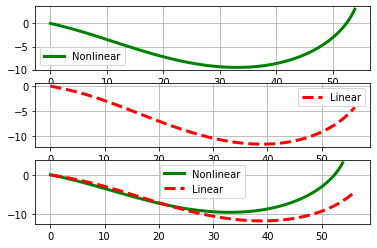

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

LR = 5
LF = 5

# function that returns dz/dt
# dz/dt:
#  0: dx/dt
#  1: dy/dt
#  2: dpsi/dt
def model(z,t,velo,delta):
	lr = LR
	lf = LF
	beta = math.atan(lr/(lf+lr)*math.tan(delta))
	x0 = z[0]
	y0 = z[1]
	psi = z[2]
	dxdt = velo * math.cos(psi + beta)
	dydt = velo * math.sin(psi + beta)
	dpsi_dt = velo / lr * math.sin(beta)
	 
	return [dxdt, dydt, dpsi_dt]


# final time
tf = 10

# number of time points
n = tf * 10 + 1

# time points
t = np.linspace(0,tf,n)

# store solution
nonlinear = np.zeros([3, n])

# initial condition
z0 = nonlinear[:,0].flatten()

# The vehicle speed at different moments can be a custom sequence, but the speed difference at any continuous moment should not be too large to ensure that the acceleration is within a reasonable range
velo_series = np.arange(n)/10 + 1
# The steering wheel angle at each moment, you can customize the angle, here is set as [-pi/6, pi/6]
delta_series = np.linspace(0, math.pi/3, n) - math.pi/6

# solve ODE
for i in range(1,n):
	# span for next time step
	tspan = [t[i-1],t[i]]
	# solve for next step
	out = odeint(model,z0,tspan, args=(velo_series[i],delta_series[i]))
	# store solution for plotting
	nonlinear[:,i] = out[1]
	# next initial condition
	z0 = out[1]


linear = np.empty_like(nonlinear)
linear[:,0:2] = nonlinear[:,0:2] 

for i in range(2,n):
	T = t[i] - t[i-1]
	A = np.array([[1,0,-math.sin(linear[2][i-1])*velo_series[i-1]*T],[0,1,math.cos(linear[2][i-1])*velo_series[i-1]*T],[0,0,1]])
	beta = math.atan(LR/(LF+LR)*math.tan(delta_series[i-1]))
	B = np.array([[math.cos(linear[2][i-1])*T,0],[math.sin(linear[2][i-1]*T),0],[math.sin(beta)*T/LR, velo_series[i-1]*T/(LR+LF)/math.cos(delta_series[i-1])**2]])
	diff = np.matmul(A, (linear[:,i-1]-linear[:,i-2]).reshape(3,1)) + np.matmul(B, np.array([[velo_series[i-1]- velo_series[i-2]],[delta_series[i-1]-delta_series[i-2]]]))
	linear[:,i] = linear[:,i-1] + diff.reshape(3)

# plot results
plt.figure(1)
plt.subplot(3,1,1)
plt.plot(nonlinear[0],nonlinear[1],'g-',linewidth=3,label='Nonlinear')
plt.grid()
plt.legend(loc='best')
plt.subplot(3,1,2)
plt.plot(linear[0],linear[1],'r--',linewidth=3,label='Linear')
plt.grid()
plt.legend(loc='best')
plt.subplot(3,1,3)
plt.plot(nonlinear[0],nonlinear[1],'g-',linewidth=3,label='Nonlinear')
plt.plot(linear[0],linear[1],'r--',linewidth=3,label='Linear')
plt.grid()
plt.legend(loc='best')
plt.show()

In [ ]:
!pip install pysd

/content/kinematic.py:170: RuntimeWarning: invalid value encountered in double_scalars
  return (velo() / (lf() * np.sin(bta())))


Previous X:  0  | Current X:  0.0
Previous Y:  0  | Current Y:  0.0
Previous PSI:  0  | current PSI:  nan
X:  0.0  | Y:  0.0  | PSI:  nan
Previous X:  0.0  | Current X:  2.991290831112369
Previous Y:  0.0  | Current Y:  -0.22842758962759901
Previous PSI:  nan  | current PSI:  -26.26652940558398
X:  2.991290831112369  | Y:  -0.22842758962759901  | PSI:  -26.26652940558398
Previous X:  2.991290831112369  | Current X:  5.928391790819314
Previous Y:  -0.22842758962759901  | Current Y:  -0.9242135979015753
Previous PSI:  -26.26652940558398  | current PSI:  -25.968023035467063
X:  8.919682621931683  | Y:  -1.1526411875291744  | PSI:  -52.234552441051044
Previous X:  5.928391790819314  | Current X:  8.746875775238502
Previous Y:  -0.9242135979015753  | Current Y:  -2.119472616606747
Previous PSI:  -25.968023035467063  | current PSI:  -25.478036176024496
X:  14.675267566057816  | Y:  -3.0436862145083223  | PSI:  -51.44605921149156
Previous X:  8.746875775238502  | Current X:  11.35905807159262

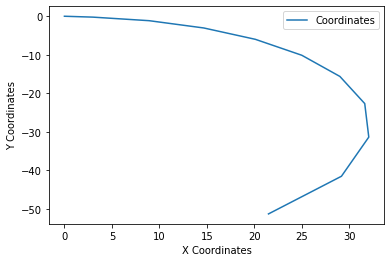

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pysd
import pandas as pd

#model = pysd.read_vensim('/PythonProjects/KinematicModel/pysd/tests/test-models/test-models/samples/kinematic/kinematic.mdl')
model = pysd.read_vensim('/content/kinematic.mdl')

series = pd.Series(index=range(30), data=range(0,30,1))

#90 degree turn
angle_series = pd.Series(index=range(90), data=range(0,90,1))
#chicane turn
#angle_series = pd.Series([0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, -1, -2, -5, 0, 0, 0])

#inputs: velo, rate of change of steering angle
#delta defined by steering rate (psi)
stocks = model.run(params={'velo':series, 'delta':angle_series},
                    return_columns=['x_next', 'y_next', 'psi_next', 'delta'],
                    return_timestamps=[0,3,6,9,12,15,18,21,24,27,30])

prevX = "0"
prevY = "0"
prevPSI = "0"

dfnumpy = stocks.to_numpy()

for val in dfnumpy:
    currX = val[0]
    currY = val[1]
    currPSI = val[2]

    print("Previous X: ", prevX, " | Current X: ", currX)
    print("Previous Y: ", prevY, " | Current Y: ", currY)
    print("Previous PSI: ", prevPSI, " | current PSI: ", currPSI)

    val[0] = float(prevX) + float(currX)
    val[1] = float(prevY) + float(currY) 

    if not pd.isnull(prevPSI) and not pd.isnull(currPSI):
        val[2] = float(prevPSI) + float(currPSI)

    print("X: ", val[0], " | Y: ", val[1], " | PSI: ", val[2]) 

    prevX = currX
    prevY = currY
    prevPSI = currPSI
    
stocks.plot('x_next', 'y_next', label = 'Coordinates')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()